# Introduction to Data Science 
# Lecture 25: Dimension Reduction - Activity
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In [1]:
# imports and setup 

import numpy as np

import pandas as pd
pd.set_option('display.notebook_repr_html', False)

from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import homogeneity_score, v_measure_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

import seaborn as sns

In this activity we will consider an RNA data set taken from [here](https://www.nature.com/articles/s41592-019-0425-8). This data set contains genetic information on 296 different cells, recording 3000 distinct gene counts/features for each cell. The cells were synthetically generated in various mixtures (7 different cell types) so that ground truth cell type information is in fact available. Note this data has already been imputed and scaled, so you don't need to rescale.

In [26]:
# Read in the data

rna_data = pd.read_csv("rnamix1_SCT.csv")
rna_labels = pd.read_csv("rnamix1_labels.csv",index_col=0)
print(rna_data.info())
print(rna_data.head())
rna_labels

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Columns: 3000 entries, ENSG00000019582 to ENSG00000116560
dtypes: float64(3000)
memory usage: 6.8 MB
None
   ENSG00000019582  ENSG00000132432  ENSG00000234745  ENSG00000146648  \
0         4.317488         3.135494         4.382027         2.397895   
1         3.258097         4.382027         3.135494         3.688879   
2         3.465736         4.844187         3.496508         4.007333   
3         3.332205         5.017280         3.465736         4.025352   
4         3.332205         5.111988         3.526361         4.060443   

   ENSG00000108602  ERCC-00130  ERCC-00096  ERCC-00002  ERCC-00046  \
0         3.806662    3.713572    3.496508    3.610918    2.995732   
1         2.564949    5.043425    4.836282    4.875197    4.077537   
2         2.890372    4.442651    4.110874    4.262680    3.433987   
3         2.890372    4.369448    4.094345    4.262680    3.465736   
4         2.833213    4.406719   

            CellType
CellNumber          
1                  1
2                  2
3                  2
4                  2
5                  2
...              ...
292                7
293                7
294                7
295                7
296                7

[296 rows x 1 columns]

(1) Make a 2-dimensional PCA plot of the data, and color it by the cell types. 

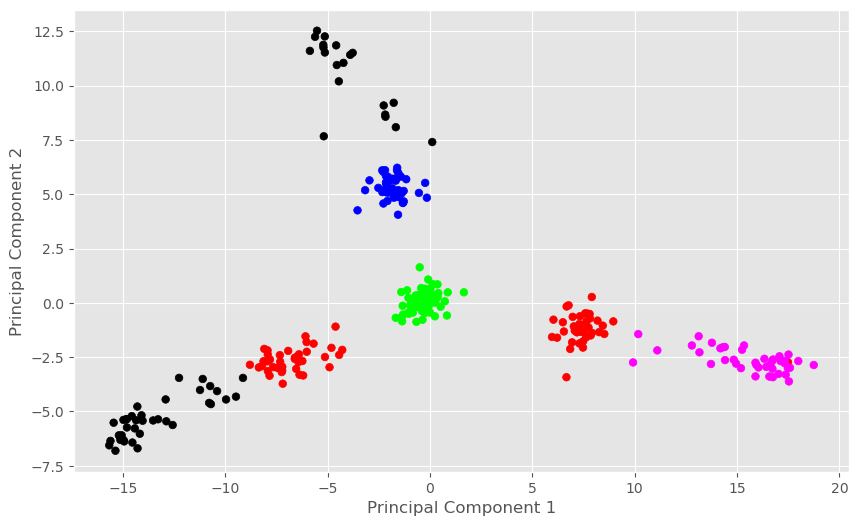

In [32]:
# Your code goes here
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '000000', '#000000', '#FF00FF', '#FF0000'])

pca_model = PCA()
X_PCA = pca_model.fit_transform(rna_data)

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c = rna_labels['CellType'], cmap = cmap_bold, s=30)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

(2) What percentage of the variance is captured by the first 2 PC's? Make a plot showing the decay of the variance explained by the first 100 PC's. How many PC's would you need to capture 90% of the variance?

[2.76456119e-01 6.70078902e-02 3.15827691e-02 1.21257136e-02
 9.45516509e-03 6.76412797e-03 5.45229706e-03 4.92908544e-03
 4.69705368e-03 4.45836248e-03 4.24097249e-03 4.09819393e-03
 4.04083208e-03 3.98434129e-03 3.89764362e-03 3.86767110e-03
 3.85160624e-03 3.83208954e-03 3.76831638e-03 3.74598710e-03
 3.70035838e-03 3.65089982e-03 3.60135488e-03 3.57732487e-03
 3.56288059e-03 3.52845195e-03 3.51770654e-03 3.51209604e-03
 3.49604872e-03 3.47123437e-03 3.44264893e-03 3.38996850e-03
 3.37995499e-03 3.34733874e-03 3.32881484e-03 3.31622703e-03
 3.28514328e-03 3.27205030e-03 3.26238409e-03 3.24097131e-03
 3.21485160e-03 3.19399775e-03 3.17837058e-03 3.17028185e-03
 3.13389188e-03 3.11575568e-03 3.10212405e-03 3.09066404e-03
 3.08328682e-03 3.07409488e-03 3.05648673e-03 3.04289997e-03
 3.03119225e-03 3.00872959e-03 2.98607127e-03 2.97486883e-03
 2.93895118e-03 2.92933938e-03 2.91612491e-03 2.90254047e-03
 2.89628054e-03 2.87382965e-03 2.86950102e-03 2.85893956e-03
 2.84485389e-03 2.834037

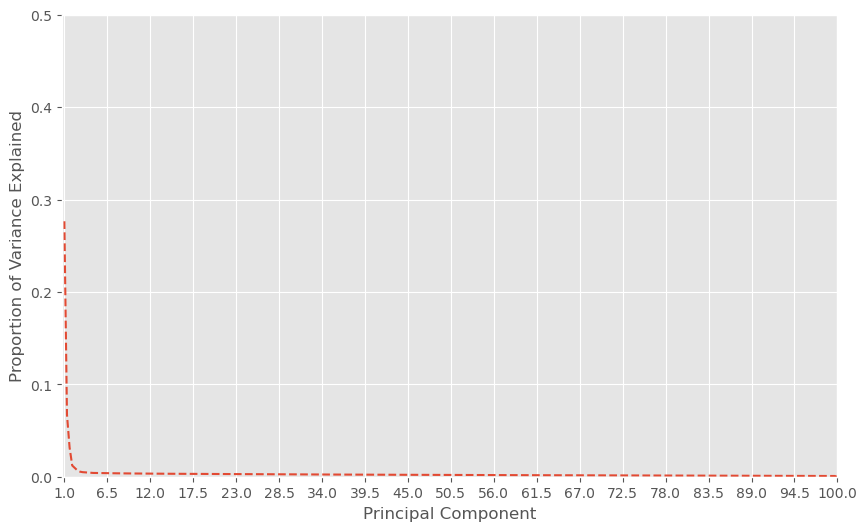

In [14]:
# Your code goes here
var_ratio = pca_model.explained_variance_ratio_
print(var_ratio)

plt.plot(np.linspace(1, 100, num = 296), var_ratio, '--')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,0.5)
plt.xticks(np.linspace(1, 100, num = 19))
plt.show()

(3) Calculate the v_measure_score obtained by running kmeans with k = 7 on the 2-dimensional PCA plot. Can you achieve a higher score by using more PCs?

In [38]:
# Your code goes here
X_PCA = PCA(n_components=5).fit_transform(rna_data)
kmeans_model = KMeans(init='k-means++', n_clusters=7, n_init=10,random_state=1)
kmeans_model.fit(X_PCA)
metric = metrics.v_measure_score(labels_true=rna_labels['CellType'], labels_pred=kmeans_model.labels_)
print(metric)

0.9023402958987059
